# Load ranked hyper-params and join selections

### Import/init

In [25]:
import os
import csv
import numpy as np
import pandas as pd

from collections import defaultdict
from csv import DictReader

import matplotlib.pyplot as plt
%matplotlib inline

def load_params(file):
    """Custom loading fn"""
    table = defaultdict(list)
    with open(file, 'r') as f:
        reader = DictReader(f)
        for row in reader:
            for col, dat in row.items():
                table[col].append(float(dat))
    return table

In [26]:
# Shared base path
path = "/Users/type/Code/azad/data/wythoff/"

### Load param data

In [27]:
# Stumbler 
exp6 = load_params(os.path.join(path, "exp6_ranked.csv"))

In [28]:
# Stumbler-strategist
# learning_rate_stumbler, num_stumbles, num_strategies
exp7 = load_params(os.path.join(path, "exp7_ranked.csv"))

# H/C thresholds
exp8 = load_params(os.path.join(path, "exp8_ranked.csv"))

# learning_rate_influence, num_hidden1, num_hidden2
exp12 = load_params(os.path.join(path, "exp12_ranked.csv"))

In [29]:
# exp6

# Select top_n rows from hand-picked columns

- Rename cols as needed so they match the `wythoff_stumbler_strategist` call signature.

In [30]:
top_n = 20

In [31]:
print(6, exp6.keys())
print(7, exp7.keys())
print(8, exp8.keys())
print(12, exp12.keys())

6 dict_keys(['row_code', 'gamma', 'epsilon', 'learning_rate', 'score'])
7 dict_keys(['row_code', 'learning_rate_strategist', 'num_stumbles', 'num_strategies', 'stumbler_score', 'strategist_score', 'influence'])
8 dict_keys(['row_code', 'hot_threshold', 'cold_threshold', 'strategist_score', 'influence'])
12 dict_keys(['row_code', 'learning_rate', 'num_hidden1', 'num_hidden2', 'stumbler_score', 'strategist_score', 'influence'])


In [32]:
# Select params from each exp

# old : new name
exp6_cols = {
    'gamma' : 'gamma',
    'epsilon' : 'epsilon',
    'learning_rate' : 'learning_rate_stumbler'    
}

exp7_cols = {
    'learning_rate_strategist' : 'learning_rate_strategist',
    'num_stumbles' : 'num_stumbles',
    'num_strategies' : 'num_strategies',
}

exp8_cols = {
    'hot_threshold' : 'hot_threshold',
    'cold_threshold' : 'cold_threshold',
}

exp12_cols = {
    'learning_rate' : 'learning_rate_influence',
    'num_hidden1' : 'num_hidden1',
    'num_hidden2' : 'num_hidden2'
}

In [33]:
joint = defaultdict(list)

for k, new_k in exp6_cols.items():
    joint[new_k] = exp6[k][0:top_n]
    
for k, new_k in exp7_cols.items():
    joint[new_k] = exp7[k][0:top_n]
    
for k, new_k in exp8_cols.items():
    joint[new_k] = exp8[k][0:top_n]

for k, new_k in exp12_cols.items():
    joint[new_k] = exp12[k][0:top_n]

# Save the joint data to file

In [34]:
table = []
head = sorted(joint.keys())
values = [joint[k] for k in head]
f_name = os.path.join(path, "joint_ranked.csv")

head = ("row_code", *head)
with open(f_name, "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(head)
    
    for i, row in enumerate(zip(*values)):
        writer.writerow((i, *row))

# Plot each of the selected params

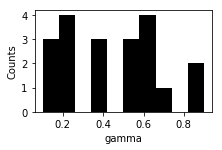

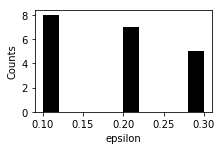

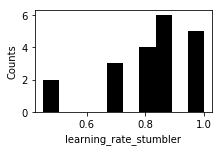

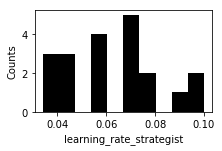

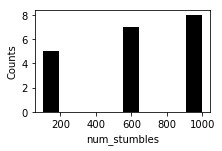

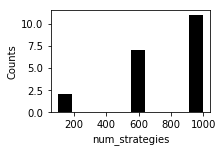

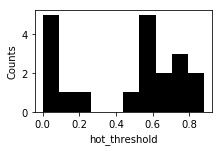

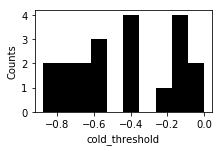

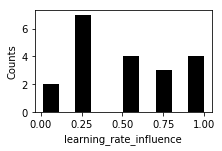

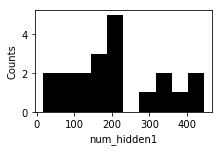

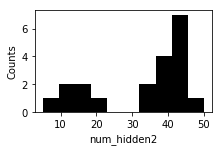

In [35]:
for k, v in joint.items():
    plt.figure(figsize=(3, 2))
    _ = plt.hist(np.asarray(v), color='black', bins=10)
    _ = plt.tight_layout()
    _ = plt.ylabel("Counts")
    _ = plt.xlabel(k)
#     _ = plt.close()